In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
titanic_df = pd.read_csv('./Desktop/sklearn/Titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
len(titanic_df)

891

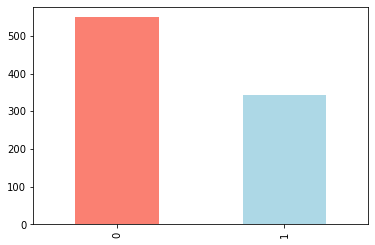

In [8]:
titanic_df['Survived'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);


In [9]:
len(titanic_df['Survived'])

891

In [10]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
pd.crosstab(titanic_df['Survived'], titanic_df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


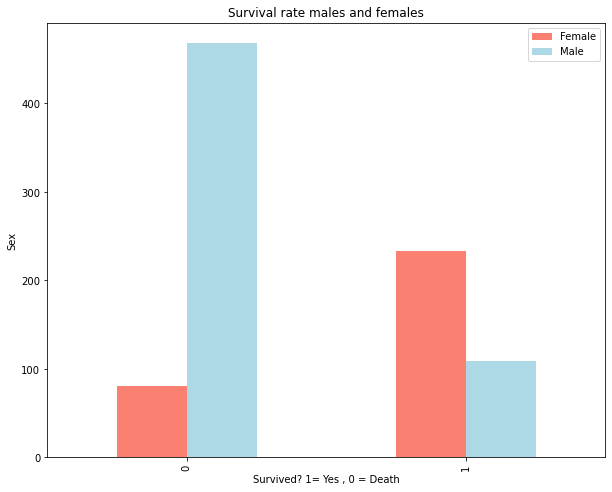

In [12]:
pd.crosstab(titanic_df['Survived'], titanic_df['Sex']).plot(kind="bar", color=["salmon", "lightblue"],figsize = (10,8));
plt.title('Survival rate males and females')
plt.xlabel('Survived? 1= Yes , 0 = Death')
plt.ylabel('Sex')
plt.legend(['Female','Male']);



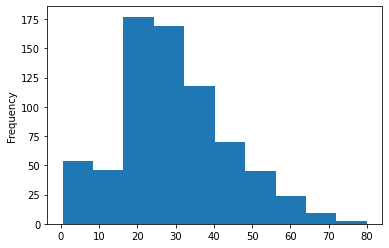

In [52]:
titanic_df.Age.plot.hist();

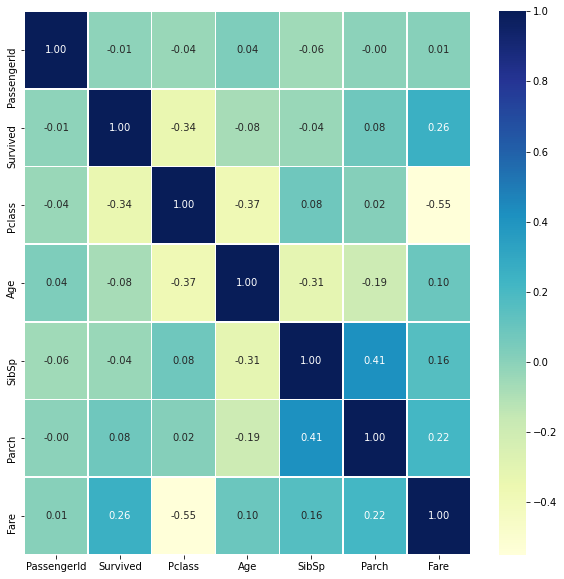

In [55]:
corr_matrix = titanic_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [56]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
for label,content in titanic_df.items():
    if pd.api.types.is_string_dtype(content):

       print(label)

Name
Sex
Ticket
Cabin
Embarked


In [28]:
# convert strings into categories
for label,content in titanic_df.items():
    if pd.api.types.is_string_dtype(content):
        titanic_df[label] = content.astype('category').cat.as_ordered()

In [70]:
titanic_df.Name.cat.categories

Index(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
       ...
       'Yrois, Miss. Henriette ("Mrs Harbeck")', 'Zabour, Miss. Hileni',
       'Zabour, Miss. Thamine', 'Zimmerman, Mr. Leo',
       'de Messemaeker, Mrs. Guillaume Joseph (Emma)',
       'de Mulder, Mr. Theodore', 'de Pelsmaeker, Mr. Alfons',
       'del Carlo, Mr. Sebastiano', 'van Billiard, Mr. Austin Blyler',
       'van Melkebeke, Mr. Philemon'],
      dtype='object', length=891)

In [71]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
# fill numeric with medians
for label,content in titanic_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
           titanic_df[label] = content.fillna(content.median())

In [13]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
# turn categorical values into numbers 
for label,content in titanic_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        titanic_df [label] = pd.Categorical(content).codes+1
        

In [31]:
x= titanic_df.drop('Survived', axis = 1)
y= titanic_df['Survived']

np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [36]:
models  = {'Random Forest': RandomForestClassifier(), 'Logistic Regression': LogisticRegression(),
          'KNeighbour' : KNeighborsClassifier()}
def model_fit_and_score (models ,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score = {}
    for name , model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score
        

In [37]:
model_fit_and_score (models ,x_train,x_test,y_train,y_test)

C:\Users\ABDELRAHMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest': 0.8324022346368715,
 'Logistic Regression': 0.7206703910614525,
 'KNeighbour': 0.659217877094972}

C:\Users\ABDELRAHMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


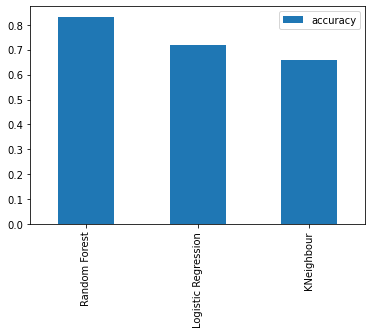

In [38]:
model_compare = pd.DataFrame(model_fit_and_score (models ,x_train,x_test,y_train,y_test), index = ['accuracy'])
model_compare.T.plot.bar();

In [40]:
model = RandomForestClassifier()

In [41]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
df_test = pd.read_csv('./Desktop/sklearn/Titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
model.predict(df_test)

ValueError: could not convert string to float: 'Kelly, Mr. James'